In [1]:
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import os, shutil
import numpy as np
%matplotlib inline
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from sklearn.metrics import roc_auc_score, recall_score
from sklearn.metrics import accuracy_score

In [2]:
# 工具类
import os
import random
import shutil
from shutil import copy2


def data_set_split(src_data_folder, target_data_folder, train_scale=0.7,  test_scale=0.3):
    '''
    读取源数据文件夹，生成划分好的文件夹，分为trian、val、test三个文件夹进行
    :param src_data_folder: 源文件夹 E:/biye/gogogo/note_book/torch_note/data/utils_test/data_split/src_data
    :param target_data_folder: 目标文件夹 E:/biye/gogogo/note_book/torch_note/data/utils_test/data_split/target_data
    :param train_scale: 训练集比例
    :param val_scale: 验证集比例
    :param test_scale: 测试集比例
    :return:
    '''
    print("开始数据集划分")
    class_names = os.listdir(src_data_folder)
    # 在目标目录下创建文件夹
    split_names = ['train', 'test']
    for split_name in split_names:
        split_path = os.path.join(target_data_folder, split_name)
        if os.path.isdir(split_path):
            pass
        else:
            os.mkdir(split_path)
        # 然后在split_path的目录下创建类别文件夹
        for class_name in class_names:
            class_split_path = os.path.join(split_path, class_name)
            if os.path.isdir(class_split_path):
                pass
            else:
                os.mkdir(class_split_path)

    # 按照比例划分数据集，并进行数据图片的复制
    # 首先进行分类遍历
    for class_name in class_names:
        current_class_data_path = os.path.join(src_data_folder, class_name)
        current_all_data = os.listdir(current_class_data_path)
        current_data_length = len(current_all_data)
        current_data_index_list = list(range(current_data_length))
        random.shuffle(current_data_index_list)
#         print(current_data_index_list)
        train_folder = os.path.join(os.path.join(target_data_folder, 'train'), class_name)
#         val_folder = os.path.join(os.path.join(target_data_folder, 'val'), class_name)
        test_folder = os.path.join(os.path.join(target_data_folder, 'test'), class_name)
        train_stop_flag = current_data_length * train_scale
#         val_stop_flag = current_data_length * (train_scale + val_scale)
        current_idx = 0
        train_num = 0
#         val_num = 0
        test_num = 0
        for i in current_data_index_list:
            src_img_path = os.path.join(current_class_data_path, current_all_data[i])
            print(current_idx,train_stop_flag,i)
            
            if current_idx <= train_stop_flag:
                copy2(src_img_path, train_folder)
                # print("{}复制到了{}".format(src_img_path, train_folder))
                train_num = train_num + 1
                print('加入训练集')
#             elif (current_idx > train_stop_flag) and (current_idx <= val_stop_flag):
#                 copy2(src_img_path, val_folder)
#                 # print("{}复制到了{}".format(src_img_path, val_folder))
#                 val_num = val_num + 1
            elif (current_idx >train_stop_flag) and (current_idx<=current_data_length ):
                copy2(src_img_path, test_folder)
                # print("{}复制到了{}".format(src_img_path, test_folder))
                test_num = test_num + 1
                print('加入测试集')

            current_idx = current_idx + 1

        print("*********************************{}*************************************".format(class_name))
        print(
            "{}类按照{}：{}的比例划分完成，一共{}张图片".format(class_name, train_scale, test_scale, current_data_length))
        print("训练集{}：{}张".format(train_folder, train_num))
#         print("验证集{}：{}张".format(val_folder, val_num))
        print("测试集{}：{}张".format(test_folder, test_num))




In [4]:
if __name__ == '__main__':
    src_data_folder = "dataset"
    target_data_folder = "new_dataset6"
    data_set_split(src_data_folder, target_data_folder)

开始数据集划分
0 154.0 113
加入训练集
1 154.0 155
加入训练集
2 154.0 71
加入训练集
3 154.0 73
加入训练集
4 154.0 127
加入训练集
5 154.0 158
加入训练集
6 154.0 102
加入训练集
7 154.0 110
加入训练集
8 154.0 45
加入训练集
9 154.0 148
加入训练集
10 154.0 90
加入训练集
11 154.0 55
加入训练集
12 154.0 63
加入训练集
13 154.0 175
加入训练集
14 154.0 94
加入训练集
15 154.0 69
加入训练集
16 154.0 22
加入训练集
17 154.0 105
加入训练集
18 154.0 164
加入训练集
19 154.0 24
加入训练集
20 154.0 166
加入训练集
21 154.0 135
加入训练集
22 154.0 176
加入训练集
23 154.0 34
加入训练集
24 154.0 157
加入训练集
25 154.0 194
加入训练集
26 154.0 31
加入训练集
27 154.0 14
加入训练集
28 154.0 151
加入训练集
29 154.0 107
加入训练集
30 154.0 133
加入训练集
31 154.0 199
加入训练集
32 154.0 162
加入训练集
33 154.0 97
加入训练集
34 154.0 121
加入训练集
35 154.0 153
加入训练集
36 154.0 26
加入训练集
37 154.0 143
加入训练集
38 154.0 189
加入训练集
39 154.0 171
加入训练集
40 154.0 117
加入训练集
41 154.0 209
加入训练集
42 154.0 56
加入训练集
43 154.0 212
加入训练集
44 154.0 13
加入训练集
45 154.0 192
加入训练集
46 154.0 124
加入训练集
47 154.0 120
加入训练集
48 154.0 174
加入训练集
49 154.0 179
加入训练集
50 154.0 46
加入训练集
51 154.0 66
加入训练集
52 154.0 48
加入训练集
53 154.0 186
加入

In [7]:
!pip install --upgrade torchvision

Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x7f9c96631240>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution',)': /simple/torchvision/
  Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x7f9c94c68da0>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution',)': /packages/8e/3b/73e2cf095f0a9d0f26b008cbfc009512c53bb2a445723aaad54b33e58cb5/torchvision-0.10.1-cp36-cp36m-manylinux1_x86_64.whl
  Retrying (Retry(total=3, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x7f9c94c687f0>: Failed to establish a new connecti

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [98]:
train_transform = transforms.Compose([
      transforms.Resize([224,224]),
     transforms.ColorJitter(brightness=0, contrast=0, saturation=0, hue=0),
#      transforms.RandomResizedCrop(size=224, scale=(0.8, 1.0)),
     transforms.RandomHorizontalFlip(),#随机水平翻转图片
     transforms.RandomVerticalFlip(),
#      transforms.RandomRotation(degrees=30),#随机旋转30°
     transforms.RandomCrop(224,224),
#     transforms.RandomErasing(p=0.5, 
#                             scale=(0.02, 0.33), 
#                             ratio=(0.3, 3.3), 
#                             value=0, 
#                             inplace=False),

     transforms.ToTensor(),
     transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [12]:
test_transform = transforms.Compose([
     transforms.Resize([224,224]),
#     transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
#      transforms.RandomRotation(degrees=15),#随机旋转15°
#      transforms.RandomHorizontalFlip(),#随机水平翻转图片
#transforms.RandomCrop(20,20),#随机裁剪20*20
#     transforms.CenterCrop(80)
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [9]:
train_dataset= torchvision.datasets.ImageFolder(root='new_dataset6/train',transform = train_transform)

In [10]:
class_names = train_dataset.classes
print(class_names)

['hunzhuo', 'tuoli']


In [11]:
print(train_dataset)
print(train_dataset.class_to_idx)

Dataset ImageFolder
    Number of datapoints: 310
    Root Location: new_dataset6/train
    Transforms (if any): Compose(
                             Resize(size=[224, 224], interpolation=PIL.Image.BILINEAR)
                             RandomHorizontalFlip(p=0.5)
                             ToTensor()
                             Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
                         )
    Target Transforms (if any): None
{'hunzhuo': 0, 'tuoli': 1}


In [13]:
print(len(train_dataset))

310


In [14]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=50, shuffle=True)

In [10]:
test_dataset= torchvision.datasets.ImageFolder(root='new_dataset6/test',transform = test_transform)

In [11]:
print(len(test_dataset))

130


In [12]:
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=10, shuffle=True)

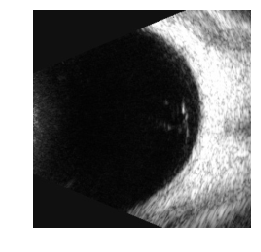

In [122]:
from PIL import Image
im = Image.open('dataset/hunzhuo/hunzhuo0.jpg')

new_im = transforms.Resize((224,224))(im)
plt.axis('off')
plt.imshow(new_im)
plt.savefig('hunzhuo原图.jpg')
plt.show()

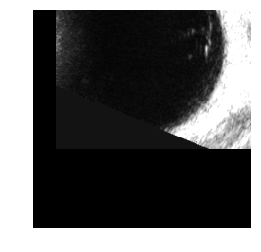

In [123]:
new_im = transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)(new_im)
new_im = transforms.RandomHorizontalFlip()(new_im)
new_im = transforms.RandomVerticalFlip()(new_im)
new_im = transforms.RandomCrop(224,224)(new_im)
plt.axis('off')
plt.imshow(new_im)
plt.savefig('组合增强')
plt.show()

In [49]:
# images, labels = next(iter(train_loader))
# print(images.size())  # torch.Size([9, 1, 28, 28])
# plt.figure(figsize=(9, 9))
# for i in range(1):
#     plt.subplot(3, 3, i+1)
# #     plt.title(labels[i].item())
#     plt.imshow(images[i].permute(1, 2, 0), cmap='gray')
#     plt.axis('off')
# plt.savefig("水平旋转.png")
# plt.show()


In [13]:
from sklearn import svm
import torchvision.models as models

In [14]:
vgg16 = models.vgg16(pretrained=True)
model = vgg16
model.classifier[-1].out_features = 2
for name, value in model.named_parameters():
    if (name == 'features.0.weight')or(name =='features.0.bias')or(name =='features.2.weight')or(name == 'features.2.bias')or(name =='features.5.weight')or(name =='features.5.bias')or(name =='features.7.weight')or(name=='features.7.bias')or(name =='features.10.weight')or(name =='features.10.bias')or(name =='features.12.weight')or(name =='features.12.bias')or(name =='features.14.weight')or(name=='features.14.bias'):
        value.requires_grad = False
for name, param in model.named_parameters():
    print(name,param.requires_grad)

features.0.weight False
features.0.bias False
features.2.weight False
features.2.bias False
features.5.weight False
features.5.bias False
features.7.weight False
features.7.bias False
features.10.weight False
features.10.bias False
features.12.weight False
features.12.bias False
features.14.weight False
features.14.bias False
features.17.weight True
features.17.bias True
features.19.weight True
features.19.bias True
features.21.weight True
features.21.bias True
features.24.weight True
features.24.bias True
features.26.weight True
features.26.bias True
features.28.weight True
features.28.bias True
classifier.0.weight True
classifier.0.bias True
classifier.3.weight True
classifier.3.bias True
classifier.6.weight True
classifier.6.bias True


In [15]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [16]:
model.classifier[6] = nn.Sequential(nn.Linear(in_features=4096, out_features=2, bias=True),nn.Softmax()
)
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [17]:
criterion=nn.CrossEntropyLoss()
params = filter(lambda p: p.requires_grad, model.parameters())
opti = torch.optim.Adam(params, lr=1e-5)

In [18]:
model = model.to(device)

In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [22]:
EPOCH =30

In [23]:
if __name__ =='__main__':
    Accuracy_list = []
    Loss_list = []
    model.train()
    for epoch in range(EPOCH):
        sum_loss = 0.0
        correct1 = 0
 
        total1 = 0
        for i,(images,labels) in enumerate(train_loader):
            num_images=images.size(0)
 
            images=Variable(images.to(device))
            labels=Variable(labels.to(device))
 
            out=model(images)
#             print(out.shape)
#             print(labels.shape)
            _, predicted = torch.max(out.data, 1)
            
#             print(predicted.shape)
            total1 += labels.size(0)
 
            correct1 += (predicted == labels).sum().item()
 
             
            loss=criterion(out,labels)
            print(loss)
            opti.zero_grad()
            loss.backward()
            opti.step()
 
            
            sum_loss += loss.item()
            if i % 2 == 0:
                print('[%d, %d] loss: %.03f'
                      % (epoch + 1, i + 1, sum_loss / 100))
                sum_loss = 0.0
        Accuracy_list.append(100.0*correct1 / total1)
        print('accurary={}'.format(100.0*correct1 / total1))
        Loss_list.append(loss.item())


tensor(0.3561, device='cuda:0', grad_fn=<NllLossBackward>)
[1, 1] loss: 0.004
tensor(0.3367, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.3794, device='cuda:0', grad_fn=<NllLossBackward>)
[1, 3] loss: 0.007
tensor(0.3686, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.3996, device='cuda:0', grad_fn=<NllLossBackward>)
[1, 5] loss: 0.008
tensor(0.3709, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.3597, device='cuda:0', grad_fn=<NllLossBackward>)
[1, 7] loss: 0.007
accurary=94.51612903225806
tensor(0.3468, device='cuda:0', grad_fn=<NllLossBackward>)
[2, 1] loss: 0.003
tensor(0.3409, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.3430, device='cuda:0', grad_fn=<NllLossBackward>)
[2, 3] loss: 0.007
tensor(0.3613, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.3370, device='cuda:0', grad_fn=<NllLossBackward>)
[2, 5] loss: 0.007
tensor(0.4044, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.5920, device='cuda:0', grad_fn=<NllLossBackward>)
[2, 7] loss: 0

In [24]:
def computeTestSetAccuracy(model, loss_function):
#     device = torch.device("cuda:5" if torch.cuda.is_available() else "cpu")
    test_acc = 0.0
    test_loss = 0.0
    precision =0.0
    recall = 0.0
    f1score = 0.0
 
    with torch.no_grad():
        model.eval()
 
        for j, (inputs, labels) in enumerate(test_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)
 
            outputs = model(inputs)
 
            loss = loss_function(outputs, labels)
 
            test_loss += loss.item() * inputs.size(0)
 
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))
 
            acc = torch.mean(correct_counts.type(torch.FloatTensor))
 
            test_acc += acc.item() * inputs.size(0)
 
            print("Test Batch Number: {:03d}, Test: Loss: {:.4f}, Accuracy: {:.4f}".format(
                j, loss.item(), acc.item()
            ))
            for j in range(inputs.size()[0]):
                print("model {} pred label:{}, true label:{}".format(len(predictions), class_names[predictions[j]], class_names[labels[j]]))
                if predictions[j] != labels[j]:
                    img = inputs[j].cpu().numpy()
                    img = img*0.5+0.5
                    img = img*255
                    img = img.transpose([1,2,0])
                    img =img.astype(np.uint8)
                    plt.imshow(img)
                    plt.show()
            labels=labels.cpu().numpy()
            predictions=predictions.cpu().numpy()
            p = precision_score(labels, predictions)  
            r = recall_score(labels, predictions)  
            f1 = f1_score(labels, predictions) 
            print('precision:'+str(p))
            print('recall:'+str(r))
            print('f1-score:'+str(f1))
            precision += p * inputs.size(0)
            recall += r * inputs.size(0)
            f1score +=f1 * inputs.size(0)

            
    test_data_size = len(test_dataset)
    avg_test_loss = test_loss/test_data_size
    avg_test_acc = test_acc/test_data_size
    avg_p = precision/test_data_size
    avg_r = recall/test_data_size
    avg_f1 = f1score/test_data_size
 
    print("total Test accuracy : " + str(avg_test_acc))
    print("total Test p : " + str(avg_p))
    print("total Test r : " + str(avg_r))
    print("total Test f1 : " + str(avg_f1))

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score

Test Batch Number: 000, Test: Loss: 0.6121, Accuracy: 0.7000
model 10 pred label:tuoli, true label:hunzhuo


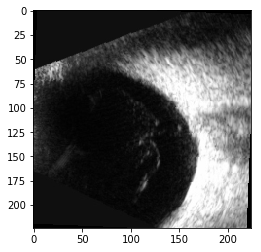

model 10 pred label:hunzhuo, true label:hunzhuo
model 10 pred label:tuoli, true label:tuoli
model 10 pred label:hunzhuo, true label:tuoli


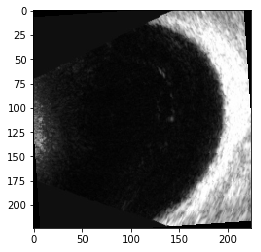

model 10 pred label:hunzhuo, true label:hunzhuo
model 10 pred label:hunzhuo, true label:hunzhuo
model 10 pred label:hunzhuo, true label:hunzhuo
model 10 pred label:hunzhuo, true label:hunzhuo
model 10 pred label:hunzhuo, true label:tuoli


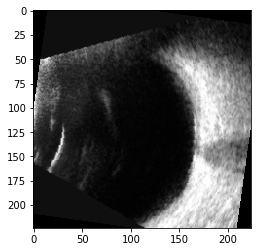

model 10 pred label:hunzhuo, true label:hunzhuo
precision:0.5
recall:0.333333333333
f1-score:0.4
Test Batch Number: 001, Test: Loss: 0.3140, Accuracy: 1.0000
model 10 pred label:hunzhuo, true label:hunzhuo
model 10 pred label:tuoli, true label:tuoli
model 10 pred label:tuoli, true label:tuoli
model 10 pred label:tuoli, true label:tuoli
model 10 pred label:tuoli, true label:tuoli
model 10 pred label:hunzhuo, true label:hunzhuo
model 10 pred label:hunzhuo, true label:hunzhuo
model 10 pred label:tuoli, true label:tuoli
model 10 pred label:hunzhuo, true label:hunzhuo
model 10 pred label:tuoli, true label:tuoli
precision:1.0
recall:1.0
f1-score:1.0
Test Batch Number: 002, Test: Loss: 0.3133, Accuracy: 1.0000
model 10 pred label:hunzhuo, true label:hunzhuo
model 10 pred label:hunzhuo, true label:hunzhuo
model 10 pred label:hunzhuo, true label:hunzhuo
model 10 pred label:tuoli, true label:tuoli
model 10 pred label:tuoli, true label:tuoli
model 10 pred label:hunzhuo, true label:hunzhuo
model 1

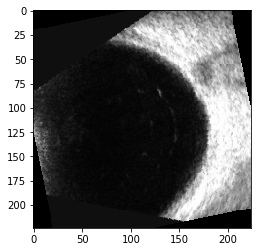

precision:1.0
recall:0.666666666667
f1-score:0.8
Test Batch Number: 005, Test: Loss: 0.3975, Accuracy: 0.9000
model 10 pred label:hunzhuo, true label:hunzhuo
model 10 pred label:hunzhuo, true label:hunzhuo
model 10 pred label:hunzhuo, true label:hunzhuo
model 10 pred label:tuoli, true label:tuoli
model 10 pred label:tuoli, true label:tuoli
model 10 pred label:hunzhuo, true label:hunzhuo
model 10 pred label:hunzhuo, true label:hunzhuo
model 10 pred label:tuoli, true label:tuoli
model 10 pred label:tuoli, true label:tuoli
model 10 pred label:hunzhuo, true label:tuoli


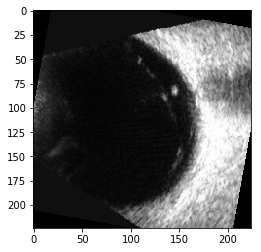

precision:1.0
recall:0.8
f1-score:0.888888888889
Test Batch Number: 006, Test: Loss: 0.3134, Accuracy: 1.0000
model 10 pred label:tuoli, true label:tuoli
model 10 pred label:hunzhuo, true label:hunzhuo
model 10 pred label:hunzhuo, true label:hunzhuo
model 10 pred label:hunzhuo, true label:hunzhuo
model 10 pred label:tuoli, true label:tuoli
model 10 pred label:hunzhuo, true label:hunzhuo
model 10 pred label:tuoli, true label:tuoli
model 10 pred label:hunzhuo, true label:hunzhuo
model 10 pred label:hunzhuo, true label:hunzhuo
model 10 pred label:hunzhuo, true label:hunzhuo
precision:1.0
recall:1.0
f1-score:1.0
Test Batch Number: 007, Test: Loss: 0.4794, Accuracy: 0.8000
model 10 pred label:tuoli, true label:tuoli
model 10 pred label:tuoli, true label:tuoli
model 10 pred label:tuoli, true label:tuoli
model 10 pred label:hunzhuo, true label:tuoli


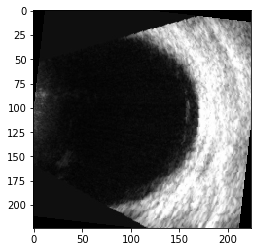

model 10 pred label:hunzhuo, true label:hunzhuo
model 10 pred label:tuoli, true label:tuoli
model 10 pred label:tuoli, true label:tuoli
model 10 pred label:hunzhuo, true label:hunzhuo
model 10 pred label:hunzhuo, true label:hunzhuo
model 10 pred label:tuoli, true label:hunzhuo


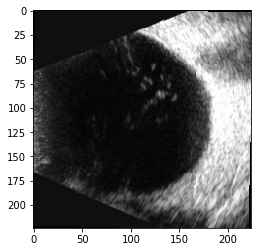

precision:0.833333333333
recall:0.833333333333
f1-score:0.833333333333
Test Batch Number: 008, Test: Loss: 0.3136, Accuracy: 1.0000
model 10 pred label:hunzhuo, true label:hunzhuo
model 10 pred label:tuoli, true label:tuoli
model 10 pred label:tuoli, true label:tuoli
model 10 pred label:hunzhuo, true label:hunzhuo
model 10 pred label:tuoli, true label:tuoli
model 10 pred label:hunzhuo, true label:hunzhuo
model 10 pred label:tuoli, true label:tuoli
model 10 pred label:tuoli, true label:tuoli
model 10 pred label:hunzhuo, true label:hunzhuo
model 10 pred label:hunzhuo, true label:hunzhuo
precision:1.0
recall:1.0
f1-score:1.0
Test Batch Number: 009, Test: Loss: 0.3134, Accuracy: 1.0000
model 10 pred label:hunzhuo, true label:hunzhuo
model 10 pred label:tuoli, true label:tuoli
model 10 pred label:tuoli, true label:tuoli
model 10 pred label:tuoli, true label:tuoli
model 10 pred label:tuoli, true label:tuoli
model 10 pred label:tuoli, true label:tuoli
model 10 pred label:tuoli, true label:tuo

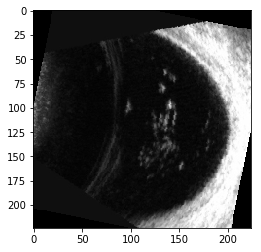

model 10 pred label:tuoli, true label:tuoli
model 10 pred label:hunzhuo, true label:hunzhuo
model 10 pred label:tuoli, true label:tuoli
model 10 pred label:hunzhuo, true label:hunzhuo
model 10 pred label:tuoli, true label:tuoli
model 10 pred label:tuoli, true label:tuoli
precision:0.833333333333
recall:1.0
f1-score:0.909090909091
Test Batch Number: 011, Test: Loss: 0.3139, Accuracy: 1.0000
model 10 pred label:tuoli, true label:tuoli
model 10 pred label:tuoli, true label:tuoli
model 10 pred label:hunzhuo, true label:hunzhuo
model 10 pred label:tuoli, true label:tuoli
model 10 pred label:hunzhuo, true label:hunzhuo
model 10 pred label:tuoli, true label:tuoli
model 10 pred label:hunzhuo, true label:hunzhuo
model 10 pred label:tuoli, true label:tuoli
model 10 pred label:hunzhuo, true label:hunzhuo
model 10 pred label:hunzhuo, true label:hunzhuo
precision:1.0
recall:1.0
f1-score:1.0
Test Batch Number: 012, Test: Loss: 0.3136, Accuracy: 1.0000
model 10 pred label:hunzhuo, true label:hunzhuo


In [26]:
computeTestSetAccuracy(model,criterion)

 transforms.RandomHorizontalFlip()#随机旋转

第一次

total Test accuracy : 0.9307692234332745

total Test p : 0.939010989011

total Test r : 0.927564102564

total Test f1 : 0.929214375368

第二次

total Test accuracy : 0.9461538379008954

total Test p : 0.974358974359

total Test r : 0.875457875458

total Test f1 : 0.906114398422

第三次

total Test accuracy : 0.9153846043806809

total Test p : 0.904304029304

total Test r : 0.942307692308

total Test f1 : 0.916866466866

第四次

total Test accuracy : 0.9307692188483018

total Test p : 0.931196581197

total Test r : 0.920512820513

total Test f1 : 0.9177528354

第五次

total Test accuracy : 0.9276922948543842

total Test p : 0.908882783883

total Test r : 0.912179487179

total Test f1 : 0.902038773193

总accuracy=0.927

 transforms.RandomVerticalFlip(p=0.5),#垂直翻转

第一次

total Test accuracy : 0.9307692234332745

total Test p : 0.936538461538

total Test r : 0.937728937729

total Test f1 : 0.927660373814

第二次

total Test accuracy : 0.9384615283745986

total Test p : 0.95641025641

total Test r : 0.917765567766

total Test f1 : 0.930867423175

第三次

total Test accuracy : 0.9384615283745986

total Test p : 0.984615384615

total Test r : 0.892948717949

total Test f1 : 0.929176379176

第四次

total Test accuracy : 0.91999999899130601

total Test p : 0.902197802198

total Test r : 0.906593406593

total Test f1 : 0.889052827514

第五次

total Test accuracy : 0.9046153754454392

total Test p : 0.848626373626

total Test r : 0.926923076923

total Test f1 : 0.874197170351

total accuracy = 0.926

随机裁剪（224，224）

第一次

total Test accuracy : 0.9230769184919504
    
total Test p : 0.980769230769
    
total Test r : 0.865934065934
    
total Test f1 : 0.909162205316

第二次

total Test accuracy : 0.9330769184919504

total Test p : 0.95695970696

total Test r : 0.902564102564

total Test f1 : 0.917553813708

第三次

total Test accuracy : 0.9299999899130601

total Test p : 0.902380952381

total Test r : 0.917765567766

total Test f1 : 0.903916596224

第四次

total Test accuracy : 0.9233846089656537

total Test p : 0.920512820513

total Test r : 0.905677655678

total Test f1 : 0.906714652868

第五次

total Test accuracy : 0.9230769139069778

total Test p : 0.93141025641

total Test r : 0.930128205128

total Test f1 : 0.927462426462




total accuracy =0.9262

#明暗
第一次

total Test accuracy : 0.9307692280182471

total Test p : 0.958974358974

total Test r : 0.888278388278

total Test f1 : 0.902808302808

第二次

total Test accuracy : 0.9615384569534888

total Test p : 0.980769230769

total Test r : 0.94358974359

total Test f1 : 0.955794205794

第三次

total Test accuracy : 0.9076923040243295

total Test p : 0.958241758242

total Test r : 0.866666666667

total Test f1 : 0.892029338183

第四次

total Test accuracy : 0.91999999944980328

total Test p : 0.84478021978

total Test r : 0.867521367521

total Test f1 : 0.849818770973

第五次

total Test accuracy : 0.9076922994393569

total Test p : 0.889743589744

total Test r : 0.896703296703

total Test f1 : 0.882239128393

total accuracy = 0.926

组合

第一次

total Test accuracy : 0.9384615329595712
    
total Test p : 0.945512820513
    
total Test r : 0.92673992674
    
total Test f1 : 0.931435231435

第二次

total Test accuracy : 0.9307692188483018

total Test p : 0.958241758242

total Test r : 0.910805860806

total Test f1 : 0.92531186762

第三次

total Test accuracy : 0.9230769139069778

total Test p : 0.897985347985

total Test r : 0.958241758242

total Test f1 : 0.923719016027

第四次

total Test accuracy : 0.9230769139069778

total Test p : 0.939743589744

total Test r : 0.917307692308

total Test f1 : 0.923554223554

第五次

total Test accuracy : 0.9384615329595712

total Test p : 0.935897435897

total Test r : 0.894871794872

total Test f1 : 0.910101010101


total =0.930